In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('loans_full_schema.csv')
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [3]:
# looking  at what to keep
# .iloc[row slice, column slice] 
df.iloc[:4,:7]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16


In [4]:
print(df.emp_title.value_counts().head())
print(df.emp_title.value_counts().tail())
print(df.emp_title.unique().shape)

manager    218
owner      204
teacher    201
driver     123
sales       97
Name: emp_title, dtype: int64
corporate tax director      1
captain-fire department     1
intervention specialist     1
coffee roaster              1
toolmaker                   1
Name: emp_title, dtype: int64
(4742,)


In [5]:
# removing: data won’t be meaningful and any relationship we might observe might be due to confounding relationships
#due to so many different titles

df = df.drop(["emp_title", "num_accounts_120d_past_due"], axis = 1)
df

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [6]:
# Exploring the data

# .info() will show me the dtypes and how many non-null values are present in each column
print(df.info())

# checking how many values are missing in each column and converting amount of missing values into a percentage

total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        9183 non-null   float64
 1   state                             10000 non-null  object 
 2   homeownership                     10000 non-null  object 
 3   annual_income                     10000 non-null  float64
 4   verified_income                   10000 non-null  object 
 5   debt_to_income                    9976 non-null   float64
 6   annual_income_joint               1495 non-null   float64
 7   verification_income_joint         1455 non-null   object 
 8   debt_to_income_joint              1495 non-null   float64
 9   delinq_2y                         10000 non-null  int64  
 10  months_since_last_delinq          4342 non-null   float64
 11  earliest_credit_line              10000 non-null  int64  
 12  inqui

,Total,Percent
verification_income_joint,8545,85.45
debt_to_income_joint,8505,85.05
annual_income_joint,8505,85.05
months_since_90d_late,7715,77.15
months_since_last_delinq,5658,56.58
months_since_last_credit_inquiry,1271,12.71
emp_length,817,8.17
debt_to_income,24,0.24
tax_liens,0,0.00
account_never_delinq_percent,0,0.00


In [7]:
# drop columns that have more than 50% of NaN
df = df.drop(["verification_income_joint", "debt_to_income_joint", "annual_income_joint", "months_since_90d_late",
                   "months_since_last_delinq"], axis=1)

In [8]:
#impute missing values

#still missing -  emp_length, debt_to_income, months_since_last_credit_inquiry

#fill missing emp_length with 0
df["emp_length"]= df["emp_length"].fillna(0)
#fill missing debt_to_income with mode value
df["debt_to_income"] = df["debt_to_income"].fillna(df["debt_to_income"].mode()[0])
#
df["months_since_last_credit_inquiry"] = df["months_since_last_credit_inquiry"].fillna(df["months_since_last_credit_inquiry"].mode()[0])

#print loan df
df

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,44,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,28,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,18,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,38,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [9]:
#checking for null values
df.isnull().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_accounts                0
num_cc_carry

#### Categorical variables

In [41]:
# Categorical Variables
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [40]:
df

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,0,0,90000.0,0,18.01,0,2001,6,28,...,0,0,0,0,0,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,1,1,40000.0,1,5.04,0,1996,1,30,...,1,1,0,0,0,4651.37,499.12,348.63,150.49,0.0
2,3.0,2,1,40000.0,2,21.15,0,2006,4,31,...,2,1,0,1,0,1824.63,281.80,175.37,106.43,0.0
3,1.0,3,1,30000.0,1,10.16,0,2007,0,4,...,3,2,0,0,0,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,4,1,35000.0,0,57.96,0,2008,7,22,...,0,0,0,0,0,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,14,1,108000.0,2,22.28,0,2008,5,44,...,14,2,0,0,0,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,3,0,121000.0,0,32.38,4,1994,1,28,...,9,1,0,0,0,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,42,0,67000.0,0,45.26,2,2004,0,18,...,24,1,0,1,0,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,2,0,80000.0,2,11.99,0,1999,1,38,...,15,1,0,0,0,21518.12,2873.31,2481.88,391.43,0.0


#### Standardize

In [12]:
df.mean()

emp_length                               5.445800
state                                   16.135100
homeownership                            0.656400
annual_income                        79222.148412
verified_income                          1.182600
debt_to_income                          19.261852
delinq_2y                                0.216000
earliest_credit_line                  2001.290000
inquiries_last_12m                       1.958200
total_credit_lines                      22.679600
open_credit_lines                       11.404400
total_credit_limit                  183606.230400
total_credit_utilized                51049.063100
num_collections_last_12m                 0.013800
num_historical_failed_to_pay             0.167100
current_accounts_delinq                  0.000100
total_collection_amount_ever           184.334000
current_installment_accounts             2.663600
accounts_opened_24m                      4.376100
months_since_last_credit_inquiry         6.534800


In [25]:
standardized_df = (df-df.mean())/df.std()
standardized_df

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,-0.626601,-1.375065,-0.931848,0.166494,-1.517504,-0.083365,-0.315947,-0.037201,1.698142,0.447640,...,-1.459310,-1.168046,-0.209174,-0.467545,-0.277694,1.260160,-0.125032,-0.234349,0.803210,-0.065905
1,1.166763,-1.289843,0.487786,-0.605894,-0.234311,-0.947076,-0.315947,-0.678596,-0.402583,0.615913,...,-1.321819,0.026519,-0.209174,-0.467545,-0.277694,-0.984243,-0.504042,-0.397955,-0.868263,-0.065905
2,-0.626601,-1.204621,0.487786,-0.605894,1.048882,0.125738,-0.315947,0.604194,0.857852,0.700050,...,-1.184329,0.026519,-0.209174,2.138616,-0.277694,-1.267922,-0.558945,-0.442559,-0.953431,-0.065905
3,-1.138991,-1.119399,0.487786,-0.760372,-0.234311,-0.606120,-0.315947,0.732473,-0.822728,-1.571637,...,-1.046838,1.221085,-0.209174,-0.467545,-0.277694,0.440997,0.206824,0.219414,-0.064788,-0.065905
4,1.166763,-1.034177,0.487786,-0.683133,-1.517504,2.577027,-0.315947,0.860752,2.118288,-0.057179,...,-1.459310,-1.168046,-0.209174,-0.467545,-0.277694,0.699603,-0.042844,-0.083564,0.299874,-0.065905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.166763,-0.181957,0.487786,0.444553,1.048882,0.200988,-0.315947,0.860752,1.277997,1.793825,...,0.465556,1.221085,-0.209174,-0.467545,-0.277694,0.715277,0.120146,0.133666,-0.084138,-0.065905
9996,0.654373,-1.119399,-0.931848,0.645374,-1.517504,0.873577,5.534917,-0.935154,-0.402583,0.447640,...,-0.221896,0.026519,-0.209174,-0.467545,-0.277694,-0.533037,-0.262219,-0.268223,0.007893,-0.065905
9997,1.166763,2.204258,-0.931848,-0.188805,-1.517504,1.731296,2.609485,0.347636,-0.822728,-0.393725,...,1.840461,0.026519,-0.209174,2.138616,-0.277694,1.320553,0.537252,0.125605,3.167783,-0.065905
9998,-1.138991,-1.204621,-0.931848,0.012016,1.048882,-0.484255,-0.315947,-0.293759,-0.402583,1.289006,...,0.603047,0.026519,-0.209174,-0.467545,-0.277694,0.708431,0.095769,0.151228,-0.402524,-0.065905


In [26]:
#view mean of each column
standardized_df.mean()

emp_length                         -2.309264e-17
state                              -1.183054e-16
homeownership                       1.776357e-17
annual_income                       8.242296e-17
verified_income                    -9.023893e-17
debt_to_income                      1.669775e-16
delinq_2y                           3.304024e-17
earliest_credit_line                4.671818e-15
inquiries_last_12m                  1.101341e-17
total_credit_lines                 -5.542233e-17
open_credit_lines                  -1.413980e-16
total_credit_limit                  0.000000e+00
total_credit_utilized               1.101341e-17
num_collections_last_12m           -1.421085e-18
num_historical_failed_to_pay       -2.415845e-17
current_accounts_delinq            -1.776357e-18
total_collection_amount_ever        3.907985e-18
current_installment_accounts       -7.887024e-17
accounts_opened_24m                -3.979039e-17
months_since_last_credit_inquiry    1.918465e-17
num_satisfactory_acc

In [27]:
# view the standard deviation
standardized_df.std()

emp_length                          1.0
state                               1.0
homeownership                       1.0
annual_income                       1.0
verified_income                     1.0
debt_to_income                      1.0
delinq_2y                           1.0
earliest_credit_line                1.0
inquiries_last_12m                  1.0
total_credit_lines                  1.0
open_credit_lines                   1.0
total_credit_limit                  1.0
total_credit_utilized               1.0
num_collections_last_12m            1.0
num_historical_failed_to_pay        1.0
current_accounts_delinq             1.0
total_collection_amount_ever        1.0
current_installment_accounts        1.0
accounts_opened_24m                 1.0
months_since_last_credit_inquiry    1.0
num_satisfactory_accounts           1.0
num_accounts_30d_past_due           1.0
num_active_debit_accounts           1.0
total_debit_limit                   1.0
num_total_cc_accounts               1.0


### Correlation matrix with heat map

In [28]:
corrM = df.corr()
corrM

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.006011,-0.137684,0.149330,0.011704,-0.004120,0.012520,-0.129035,0.017820,0.135199,...,0.011309,0.004896,-0.003895,-0.028431,-0.022676,0.109452,0.042122,0.033059,0.074080,-0.006868
state,0.006011,1.000000,-0.047053,-0.027053,-0.029121,0.046338,-0.003975,-0.017955,0.012084,0.027951,...,0.008023,-0.009255,-0.015248,0.005456,0.002323,0.006893,-0.029981,-0.031529,0.007407,-0.018521
homeownership,-0.137684,-0.047053,1.000000,-0.148382,0.025581,-0.054936,-0.021354,0.072950,-0.081700,-0.162004,...,-0.005342,-0.007340,0.024595,0.046037,-0.004946,-0.121585,-0.039864,-0.030867,-0.073296,0.013576
annual_income,0.149330,-0.027053,-0.148382,1.000000,0.050662,-0.175986,0.052236,-0.156001,0.090119,0.210163,...,-0.005154,0.011884,0.014348,-0.050766,0.011331,0.280170,0.162005,0.141893,0.174154,-0.005318
verified_income,0.011704,-0.029121,0.025581,0.050662,1.000000,-0.144082,0.001987,0.054185,0.009507,-0.025460,...,-0.028372,0.007594,-0.011322,-0.007888,0.045422,-0.047630,-0.012962,-0.003255,-0.074742,0.003119
debt_to_income,-0.004120,0.046338,-0.054936,-0.175986,-0.144082,1.000000,-0.027411,-0.090660,0.025039,0.199884,...,0.029641,0.006437,-0.023569,0.009482,0.008470,0.065166,-0.003842,-0.019960,0.120510,-0.009886
delinq_2y,0.012520,-0.003975,-0.021354,0.052236,0.001987,-0.027411,1.000000,-0.078109,0.003152,0.068040,...,0.007079,-0.009095,0.008179,0.032595,-0.025903,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
earliest_credit_line,-0.129035,-0.017955,0.072950,-0.156001,0.054185,-0.090660,-0.078109,1.000000,0.042745,-0.294621,...,0.011541,-0.026859,0.005864,0.024131,0.013054,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.017820,0.012084,-0.081700,0.090119,0.009507,0.025039,0.003152,0.042745,1.000000,0.210433,...,0.031114,0.003901,0.034881,0.033946,-0.018753,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.135199,0.027951,-0.162004,0.210163,-0.025460,0.199884,0.068040,-0.294621,0.210433,1.000000,...,0.015393,0.008945,-0.009225,-0.035399,0.019659,0.158414,0.082315,0.068932,0.112342,-0.030621


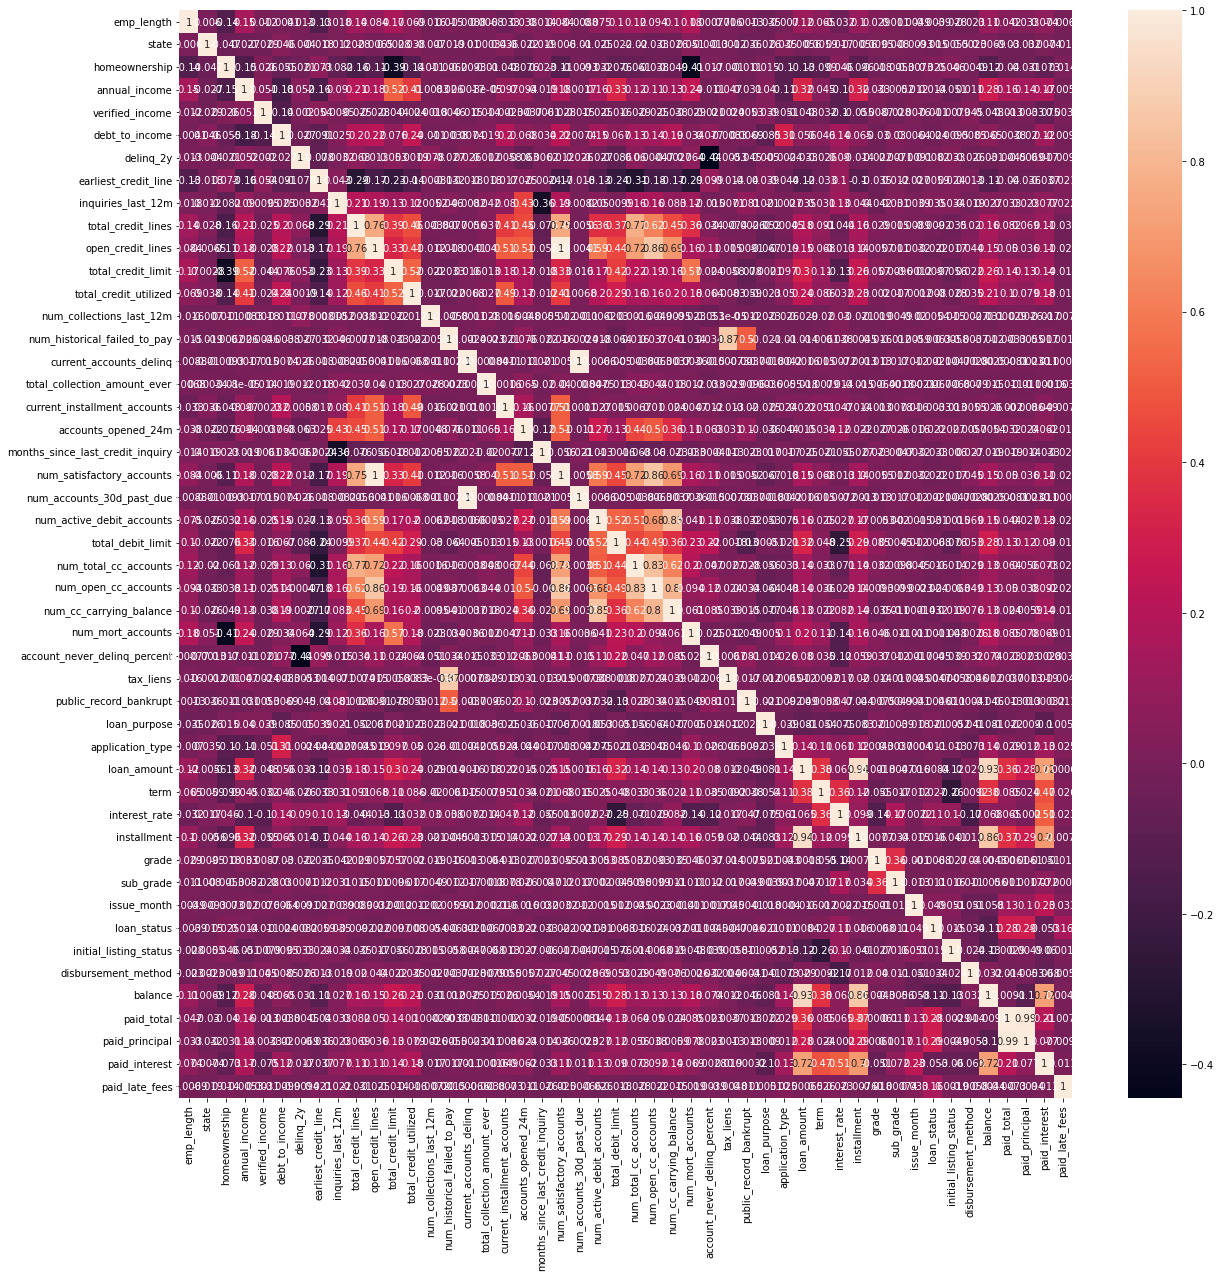

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corrM, annot=True)
plt.show()

# 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

In [33]:
print(df['loan_amount'].value_counts().count())
print(df['loan_amount'].max())
print(df['loan_amount'].min())

612
40000
1000


<AxesSubplot:ylabel='Frequency'>

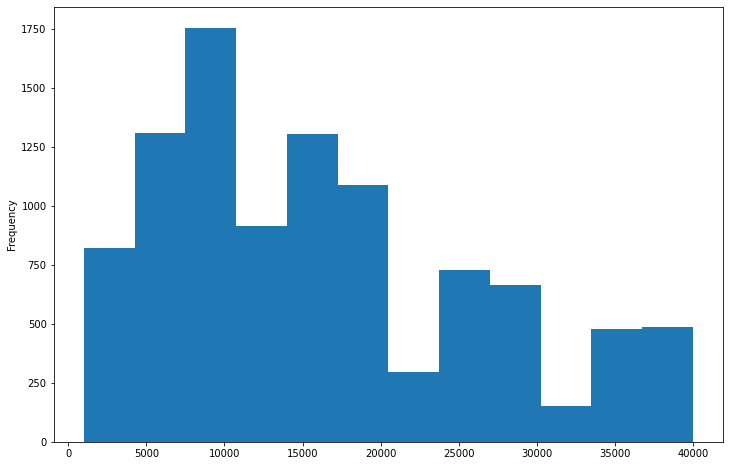

In [35]:
# bin size is 12. It's standard practice to chose a bine size between 5- 20. The larger the dataset, the higher the bin
#There are 612 different loan amounts, so divided it up evenly by choosing 12 bins

fig, ax = plt.subplots(figsize=(12,8))
df["loan_amount"].plot(kind='hist', bins = 12)

# 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

a.	Is there a better way to do this than with a lambda? 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [36]:
df['state'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
# can also create a dictionary to add the region column

regions = {'NJ': 'Northeast', 'HI': 'Pacific', 'WI': 'Midwest', 'PA': 'Northeast','CA': 'Pacific', 'KY': 'South', 
           'MI': 'Midwest', 'AZ': 'South', 'NV': 'Pacific', 'IL': 'Midwest', 'FL': 'South', 'SC': 'South', 
           'CO': 'Plains', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'NY': 'Northeast', 'GA': 'South', 'MO': 'Midwest',
           'AR': 'South', 'MD': 'Northeast', 'NC': 'South', 'NE':'Plains', 'WV':'South', 'NH': 'Northeast', 'UT': 'Plains',
           'DE': 'Northeast', 'MA': 'Northeast', 'OR': 'Pacific', 'OH': 'Midwest', 'OK': 'Plains', 'SD': 'Plains', 
           'MN': 'Midwest', 'AL': 'South', 'WY': 'Pacific', 'LA': 'South', 'IN': 'Midwest', 'KS': 'Midwest', 'MS':'South',
           'WA': "Plains", 'ME': 'Northeast', 'VT': 'Northeast', 'CT': 'Northeast', 'NM': 'Plains', 'AK': "Midwest", 
           'MT': 'Plains', 'RI': 'Northeast', 'ND': 'Plains', 'DC': 'Northeast', 'ID': 'Pacific'}

def get_region(state):
    return regions[state]

loan['region'] = loan['state'].apply(get_region)
loan